In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats

In [161]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-berezin-33/Statistics/games.csv', sep=',') # , parse_dates=['Year']

In [162]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [164]:
df = df.dropna() # удаление пустых значений

In [165]:
df.isna().sum() # проверка на путые значения

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [39]:
df.Year.describe() # базовые описательные статистики

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [40]:
df.Year.value_counts() # на сколько частов встречается определенные значения

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

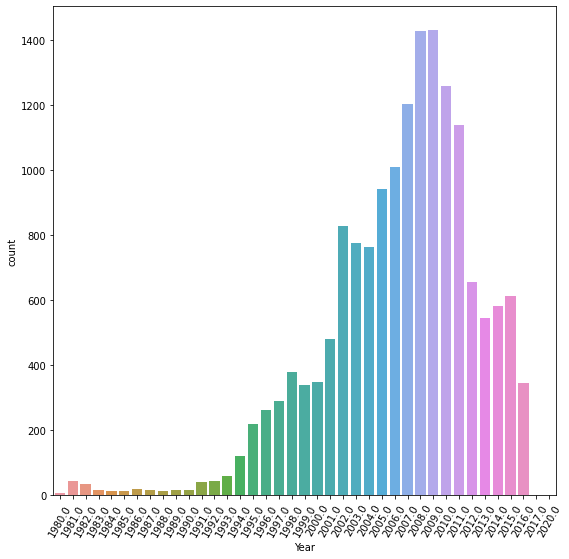

In [38]:
# график распределения количества выпущенных игр по годам
fig = plt.figure(figsize = (9, 9))
sns.countplot(df.Year)
plt.xticks(fontsize = 10, rotation = 60)

### Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. 
Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

In [67]:
value_plat = df.Platform.value_counts(normalize=True) * 100 > 7

In [68]:
value_plat

DS       True
PS2      True
PS3      True
Wii      True
X360     True
PSP      True
PS       True
PC      False
XB      False
GBA     False
GC      False
3DS     False
PSV     False
PS4     False
N64     False
SNES    False
XOne    False
SAT     False
WiiU    False
2600    False
GB      False
NES     False
DC      False
GEN     False
NG      False
SCD     False
WS      False
3DO     False
TG16    False
GG      False
PCFX    False
Name: Platform, dtype: bool

### Игры каких издателей (Publisher) встречаются в датасете чаще всего?
В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [69]:
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [87]:
df.Publisher.value_counts()[:10]

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

In [88]:
scipy.stats.mode(df.Publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

### Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). 

В каком регионе медианное значение объема продаж является наибольшим?

In [115]:
Nintendo_df = df.query('Publisher == "Nintendo"')

In [116]:
sales = Nintendo_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

In [117]:
sales.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,1.172055,0.601006,0.653721,0.136767,2.563836
std,2.989913,1.743953,1.063110,0.464170,5.676925
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.010000,0.007500,0.090000,0.000000,0.300000
50%,0.375000,0.120000,0.280000,0.030000,0.920000
75%,0.972500,0.482500,0.740000,0.090000,2.262500
max,41.490000,29.020000,10.220000,8.460000,82.740000


### Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:
- по оси x будет расположен жанр игры (Genre)
- по оси у – объем продаж в Японии (JP_sales)

Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?
- Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation
- Межквартильный размах у Strategy меньше, чем у Puzzle
- Наибольший межквартильный размах наблюдается у игр жанра Fighting

In [118]:
x = Nintendo_df.Genre
y = Nintendo_df.JP_Sales
data = Nintendo_df

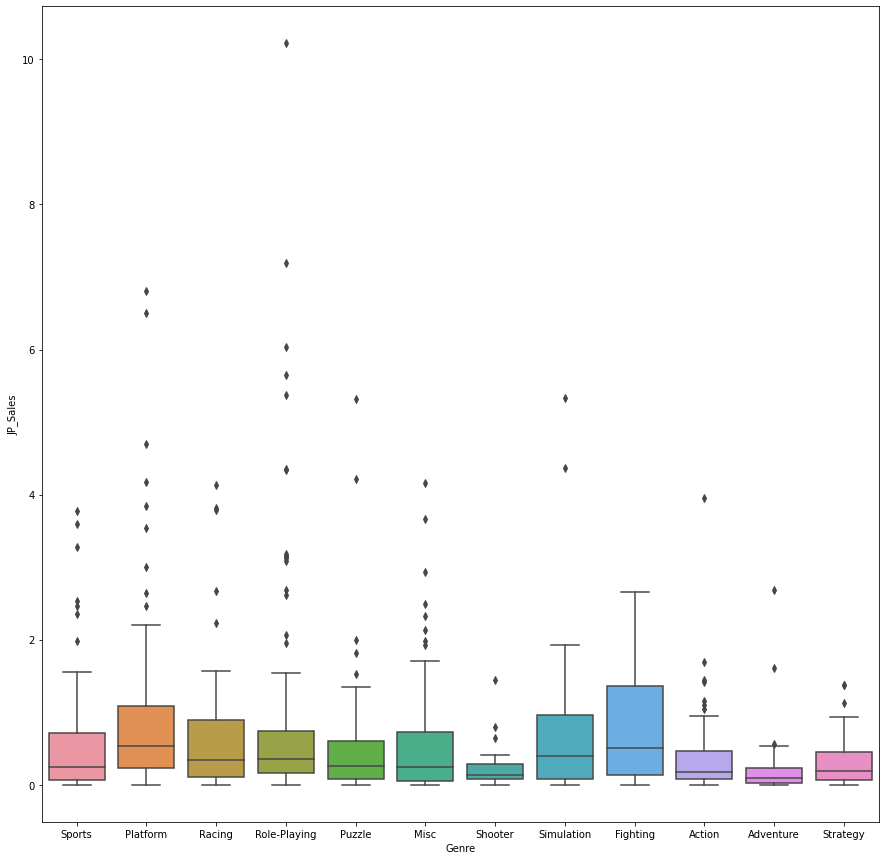

In [119]:
plt.figure(figsize=(15, 15))
sns.boxplot(x=x, y=y, data=data)

### Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

На каком отрезке времени игры жанра Sports были наиболее популярны? 
Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков.
- 2005 – 2010

In [166]:
Nintendo_df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [192]:
ll = Nintendo_df.query("Genre in ('Fighting','Simulation','Platform','Racing','Sports')") \
                    .groupby(['Year', 'Genre'], as_index=False) \
                    .agg({'Global_Sales' : 'sum'})
ll

,Year,Genre,Global_Sales
0,1983.0,Platform,5.62
1,1983.0,Sports,3.20
2,1984.0,Racing,5.68
3,1984.0,Sports,6.18
4,1985.0,Platform,43.17
...,...,...,...
109,2014.0,Sports,0.88
110,2015.0,Platform,5.24
111,2015.0,Simulation,2.98
112,2015.0,Sports,0.45


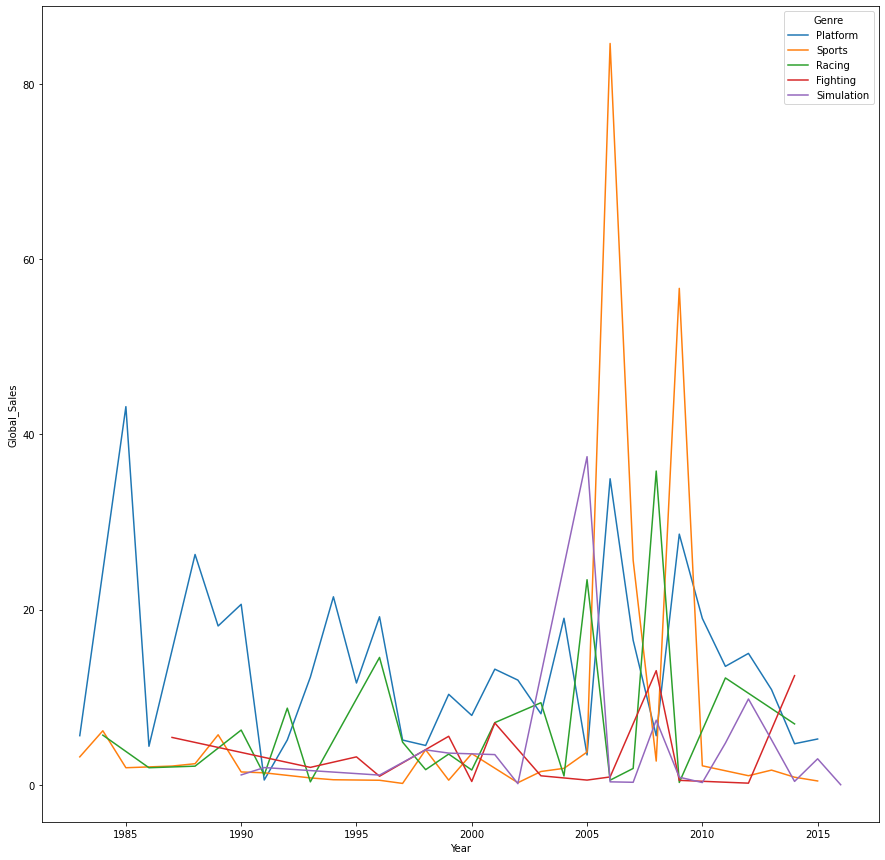

In [194]:
plt.figure(figsize=(15, 15))
sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data=ll)